In [17]:
import numpy as np

x=np.array([1,2])
x.shape
y=np.expand_dims(x, axis=-1)
y


array([[1],
       [2]])

Epoch 1/10
1875/1875 [==============================] - 35s 17ms/step - loss: 0.1419 - accuracy: 0.9564 - val_loss: 0.0473 - val_accuracy: 0.9846
Epoch 2/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0437 - accuracy: 0.9861 - val_loss: 0.0331 - val_accuracy: 0.9887
Epoch 3/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0310 - accuracy: 0.9902 - val_loss: 0.0349 - val_accuracy: 0.9890
Epoch 4/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0281 - val_accuracy: 0.9915
Epoch 5/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0188 - accuracy: 0.9938 - val_loss: 0.0357 - val_accuracy: 0.9887
Epoch 6/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0148 - accuracy: 0.9951 - val_loss: 0.0375 - val_accuracy: 0.9892
Epoch 7/10
1875/1875 [==============================] - 32s 17ms/step - loss: 0.0128 - accuracy: 0.9957 - val_loss: 0.0302 -

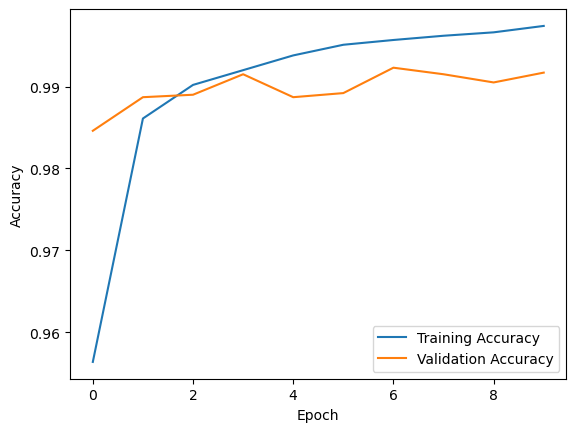

In [18]:
import numpy as np
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# Load the MNIST dataset
(train_images, train_labels), (test_images, test_labels) = datasets.mnist.load_data()

# Normalize the pixel values to range [0, 1]
train_images, test_images = train_images / 255.0, test_images / 255.0

# Add a channel dimension to the images (required for CNN input)
train_images = np.expand_dims(train_images, axis=-1)
test_images = np.expand_dims(test_images, axis=-1)

# Convert labels to one-hot encoded vectors
train_labels = tf.keras.utils.to_categorical(train_labels, num_classes=10)
test_labels = tf.keras.utils.to_categorical(test_labels, num_classes=10)


model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])


model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


history = model.fit(train_images, train_labels, epochs=10, batch_size=32, validation_data=(test_images, test_labels))

test_loss, test_acc = model.evaluate(test_images, test_labels)
print("Test accuracy:", test_acc)

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.datasets import mnist
(X_train, y_train), (X_test, y_test) = mnist.load_data()


In [2]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)


TensorFlow version: 2.13.0


In [21]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0

In [22]:
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(10)
])

In [23]:
predictions = model(x_train[:1]).numpy()
predictions

array([[ 0.05235213,  0.06716354,  0.20095927,  0.46657473, -1.0515448 ,
         0.30878234, -0.33669   , -0.5700383 ,  0.46759304, -0.03714086]],
      dtype=float32)

In [24]:
tf.nn.softmax(predictions).numpy()

array([[0.10044482, 0.10194363, 0.1165378 , 0.1519925 , 0.03330513,
        0.1298057 , 0.06807203, 0.05390472, 0.15214735, 0.09184621]],
      dtype=float32)

In [25]:
loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)

In [26]:
loss_fn(y_train[:1], predictions).numpy()

2.0417163

In [27]:
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])

In [28]:
model.fit(x_train, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2960 - accuracy: 0.9142
Epoch 2/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1393 - accuracy: 0.9587
Epoch 3/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1056 - accuracy: 0.9684
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0867 - accuracy: 0.9731
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0750 - accuracy: 0.9764


In [29]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

# Generate synthetic timeseries data
def generate_timeseries_data(n_steps):
    time = np.linspace(0, 2*np.pi, n_steps)
    data = np.sin(time) + np.random.normal(0, 0.1, n_steps)
    return data

n_steps = 100
data = generate_timeseries_data(n_steps)

# Prepare data for LSTM (input and target)
X = data[:-1]
y = data[1:]

# Reshape data for LSTM (samples, timesteps, features)
X = X.reshape(-1, 1, 1)

# Create LSTM model
model = Sequential()
model.add(LSTM(32, input_shape=(1, 1)))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X, y, epochs=100, batch_size=1)




Epoch 1/100
99/99 [==============================] - 3s 3ms/step - loss: 0.3861
Epoch 2/100
99/99 [==============================] - 0s 3ms/step - loss: 0.1898
Epoch 3/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0542
Epoch 4/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0255
Epoch 5/100
99/99 [==============================] - 0s 5ms/step - loss: 0.0244
Epoch 6/100
99/99 [==============================] - 0s 4ms/step - loss: 0.0245
Epoch 7/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0244
Epoch 8/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0245
Epoch 9/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0245
Epoch 10/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0246
Epoch 11/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0245
Epoch 12/100
99/99 [==============================] - 0s 3ms/step - loss: 0.0243
Epoch 13/100
99/99 [=================

In [1]:
import gym
import numpy as np
from keras.models import Sequential
from keras.layers import Dense

# Create the CartPole environment
env = gym.make('CartPole-v1')

# Q-learning algorithm
def q_learning(env, episodes=1000, alpha=0.1, gamma=0.99, epsilon=0.1):
    n_actions = env.action_space.n
    n_states = env.observation_space.shape[0]
    q_table = np.zeros((n_states, n_actions))

    for episode in range(episodes):
        state = env.reset()
        done = False

        while not done:
            if np.random.rand() < epsilon:
                action = env.action_space.sample()
            else:
                action = np.argmax(q_table[state, :])

            # next_state, reward, done, _ = env.step(action)
            next_state, reward, done, _, extra_value = env.step(action)


            q_next = np.max(q_table[next_state, :])
            q_table[state, action] = (1 - alpha) * q_table[state, action] + alpha * (reward + gamma * q_next)

            state = next_state

    return q_table


# Test the agent
state = env.reset()
done = False

# Train Q-learning agent
# q_table = q_learning(env)
next_state, reward, done, _ = env.step(env)



while not done:
    action = np.argmax(q_table[state, :])
    next_state, _, done, _ = env.step(action)
    env.render()
    state = next_state

env.close()



AssertionError: <TimeLimit<OrderEnforcing<PassiveEnvChecker<CartPoleEnv<CartPole-v1>>>>> (<class 'gym.wrappers.time_limit.TimeLimit'>) invalid

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from keras.models import Sequential
from keras.layers import Dense


In [3]:
# Load Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create the SVM model using SVC from scikit-learn
svm_model = SVC(kernel='linear')
svm_model.fit(X_train, y_train)

# Evaluate the SVM model
accuracy = svm_model.score(X_test, y_test)
print("SVM accuracy:", accuracy)

# Alternatively, you can use Keras to build an SVM-like model
model = Sequential()
model.add(Dense(1, input_dim=4, activation='linear'))
model.compile(optimizer='adam', loss='hinge', metrics=['accuracy'])

# Train the SVM-like model
model.fit(X_train, y_train, epochs=100, batch_size=32)

# Evaluate the SVM-like model
_, accuracy = model.evaluate(X_test, y_test)
print("SVM-like model accuracy:", accuracy)


SVM accuracy: 1.0
Epoch 1/100
4/4 [==============================] - 1s 7ms/step - loss: 1.1728 - accuracy: 0.3333
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.1050 - accuracy: 0.3333
Epoch 3/100
4/4 [==============================] - 0s 4ms/step - loss: 1.0391 - accuracy: 0.3333
Epoch 4/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9744 - accuracy: 0.3333
Epoch 5/100
4/4 [==============================] - 0s 4ms/step - loss: 0.9116 - accuracy: 0.3333
Epoch 6/100
4/4 [==============================] - 0s 4ms/step - loss: 0.8533 - accuracy: 0.3333
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8070 - accuracy: 0.3333
Epoch 8/100
4/4 [==============================] - 0s 6ms/step - loss: 0.7664 - accuracy: 0.3333
Epoch 9/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7335 - accuracy: 0.3500
Epoch 10/100
4/4 [==============================] - 0s 4ms/step - loss: 0.7030 - accuracy: 0.3583
Epoch 11/10

In [4]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

# Load the Iris dataset
iris = load_iris()
X, y = iris.data, iris.target

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [5]:
from keras.models import Sequential
from keras.layers import Dense
# Create the MLP model
model = Sequential()
model.add(Dense(10, activation='relu', input_shape=(X_train.shape[1],)))
model.add(Dense(3, activation='softmax'))

# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])


In [6]:
# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.1)


Epoch 1/50
4/4 [==============================] - 2s 113ms/step - loss: 1.8906 - accuracy: 0.3333 - val_loss: 1.3702 - val_accuracy: 0.4167
Epoch 2/50
4/4 [==============================] - 0s 24ms/step - loss: 1.8442 - accuracy: 0.3333 - val_loss: 1.3387 - val_accuracy: 0.4167
Epoch 3/50
4/4 [==============================] - 0s 24ms/step - loss: 1.8054 - accuracy: 0.3333 - val_loss: 1.3103 - val_accuracy: 0.4167
Epoch 4/50
4/4 [==============================] - 0s 21ms/step - loss: 1.7627 - accuracy: 0.3333 - val_loss: 1.2851 - val_accuracy: 0.4167
Epoch 5/50
4/4 [==============================] - 0s 19ms/step - loss: 1.7266 - accuracy: 0.3333 - val_loss: 1.2616 - val_accuracy: 0.4167
Epoch 6/50
4/4 [==============================] - 0s 16ms/step - loss: 1.6910 - accuracy: 0.3333 - val_loss: 1.2398 - val_accuracy: 0.4167
Epoch 7/50
4/4 [==============================] - 0s 28ms/step - loss: 1.6582 - accuracy: 0.3333 - val_loss: 1.2196 - val_accuracy: 0.4167
Epoch 8/50
4/4 [==========

In [7]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Loss:", test_loss)
print("Test Accuracy:", test_accuracy)


1/1 [==============================] - 0s 64ms/step - loss: 1.0427 - accuracy: 0.0333
Test Loss: 1.0426613092422485
Test Accuracy: 0.03333333507180214


In [8]:
# Make predictions on new data
new_data = [[5.1, 3.5, 1.4, 0.2], [6.4, 3.2, 4.5, 1.5], [7.3, 2.9, 6.3, 1.8]]
predictions = model.predict(new_data)

# Convert predictions to class labels
predicted_classes = [iris.target_names[pred.argmax()] for pred in predictions]
print("Predicted Classes:", predicted_classes)


1/1 [==============================] - 0s 296ms/step
Predicted Classes: ['virginica', 'virginica', 'virginica']
